# Floyd-Steinberg Dithering

[`video`](https://www.youtube.com/watch?v=0L2n8Tg2FwI)

[`wiki`](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_(img, h=10):  # show the image
    img = img.copy()
    img[img > 255] = 255
    img[img < 0] = 0
    img = img.astype(np.uint8)
    w = h
    plt.figure(figsize=(w, h))
    if img.ndim == 3:  # color image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV 的色彩空間 BRG
        plt.imshow(img, vmin=0, vmax=255)
    else:  # gray image
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.xticks([]), plt.yticks([])
    plt.show()

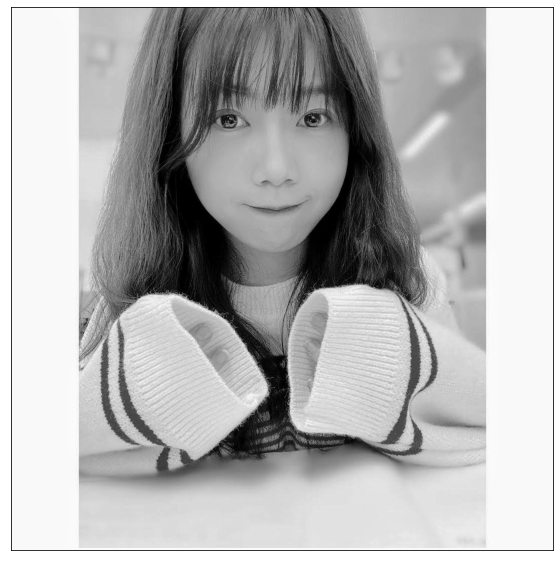

In [3]:
gray = cv2.imread('Hanne.jpg', cv2.IMREAD_GRAYSCALE)
show_(gray)

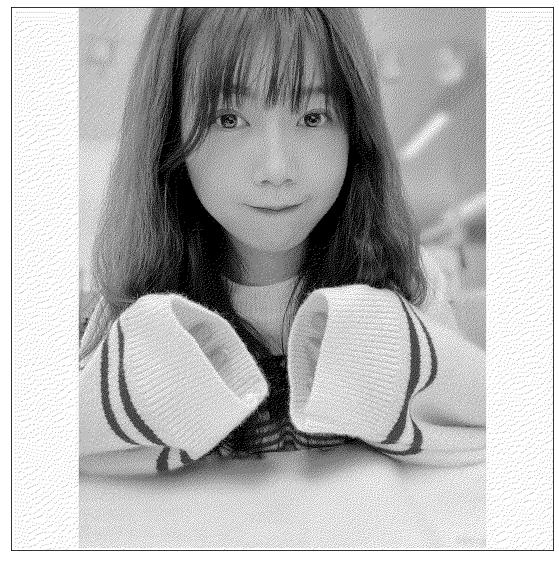

In [4]:
gray_rz = cv2.resize(gray, None, fx=1, fy=1)
h, w = gray_rz.shape


dither = np.zeros((h + 1, w + 1), dtype=np.float64)
dither[:-1, :-1] = gray_rz

threshold = 127

for i in range(h):
    for j in range(w):
        old_pix = dither[i, j]
        if (dither[i, j] > threshold):
            new_pix = 255
        else:
            new_pix = 0

        dither[i, j] = new_pix
        
        err = old_pix - new_pix

        if j > 0:
            dither[i+1, j-1] = dither[i+1, j-1] + err * 3 / 16
            dither[i+1, j] = dither[i+1, j] + err * 5 / 16
            dither[i, j+1] = dither[i, j+1] + err * 7 / 16
            dither[i+1, j+1] = dither[i+1, j+1] + err * 1 / 16

dither = dither[0:h, 0:w].astype(np.uint8)

show_(dither)
# cv2.imwrite('res3.jpg', dither)
